## Bank Marketing

- Origem dos dados: https://archive.ics.uci.edu/dataset/222/bank+marketing

**Indice**
* [0. Bibliotecas e Configurações](#0-bibliotecas-e-configurações)
* [1. Leitura das bases de dados](#1-leitura-das-bases-de-dados)
* [2. Conhecendo os dados](#2-conhecendo-os-dados)
* [3. Conhecendo os dados](#3-conhecendo-os-dados)

## 0. Bibliotecas e Configurações

In [1]:
import os
import sys

diretorio_atual = os.getcwd()
print(f"Logado no diretório: {diretorio_atual}")
sys.path.append('/home/jovyan/work')

Logado no diretório: /home/jovyan/work


In [2]:
%load_ext autoreload
%autoreload 2
import utils.EDA_pandas as eda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# -------------------------------#
# Definindo os parâmetros globais
# -- Pandas

pd.set_option('display.max_columns', None)

# -- Matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'font.size': 12,                
    'axes.labelsize': 12,           
    'axes.titlesize': 12,           
    'xtick.labelsize': 10,          
    'ytick.labelsize': 10,          
    'legend.fontsize': 10,    
    'figure.titlesize': 10,         
    # 'axes.spines.right': False,     
    # 'axes.spines.top': False
    'savefig.dpi': 300,    
    'savefig.format': 'png',  
    'savefig.bbox': 'tight',      
    'savefig.pad_inches': 0.1       
})


## 1. Leitura das bases de dados

In [3]:
# Base de treino
df_train = pd.read_csv('./data/bank-additional/bank-additional-full.csv', sep=';')

# Base de teste
df_teste = pd.read_csv('./data/bank-additional/bank-additional.csv', sep=';')                                                                                                                   

## 2. Conhecendo os dados

In [4]:
print('Volume de dados de treino:', df_train.shape[0])
print('Volume de dados de teste:', df_teste.shape[0])
print('Quantidade de colunas:', df_train.shape[1])

Volume de dados de treino: 41188
Volume de dados de teste: 4119
Quantidade de colunas: 21


In [5]:
df_train.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2.1 Definição da variável alvo (target)

In [7]:
target = 'target'
# Renomeando a coluna 'y' para 'target'
df_train.rename(columns={'y': target}, inplace=True)
df_teste.rename(columns={'y': target}, inplace=True)

# Mapeando a variável target para 0 e 1
target_map = {'no': 0, 'yes': 1}
df_train[target] = df_train[target].map(target_map)
df_teste[target] = df_teste[target].map(target_map)

### 2.2 Balanço da variável target (Base de treino)

In [8]:
pd.concat( [
    df_train[target].value_counts().rename('Counts'), 
    df_train[target].value_counts(normalize=True).rename('Percentual')], axis=1
)

,Counts,Percentual
target,,
0,36548,0.887346
1,4640,0.112654


### 2.3 Percentual do treino em relação ao teste

In [9]:
print(f'Razão entre treino e teste: {(df_teste.shape[0]/df_train.shape[0])*100:.2f}%')

Razão entre treino e teste: 10.00%


## Análise exploratória

Essa análise exploratória de dados é muito importante para entendermos o comportamento dos dados e como eles estão distribuídos. 
A análise exploratória será realizada no dataframe de treino, mas as transformações serão aplicadas em ambos os dataframes.

### Propriedades: Tipo, Cardinalidade e Dados Faltantes

In [10]:
# Contando os valores únicos em cada coluna
pd.concat([df_train.nunique(), df_train.isna().sum(), df_train.isnull().sum(), df_train.dtypes], axis=1).rename(
    columns={0: 'Unique', 1: 'NaN', 2: 'Null', 3: 'Type'}).T

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
Unique,78,12,4,8,3,3,3,2,10,5,1544,42,27,8,3,10,26,26,316,11,2
NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Type,int64,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,float64,float64,float64,float64,float64,int64


In [11]:
# Contando os valores únicos em cada coluna
pd.concat([df_teste.nunique(), df_teste.isna().sum(), df_teste.isnull().sum(), df_teste.dtypes], axis=1).rename(
    columns={0: 'Unique', 1: 'NaN', 2: 'Null', 3: 'Type'}).T

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
Unique,67,12,4,8,3,3,3,2,10,5,828,25,21,7,3,10,26,26,234,11,2
NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Type,int64,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,float64,float64,float64,float64,float64,int64


### Identificando as colunas Númericas e Categóricas

In [12]:
# Númericas
numerical_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('target')
print(numerical_features)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [13]:
# Categóricas
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


### Features Númericas

In [14]:
df_train[numerical_features].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Distribuição dos dados

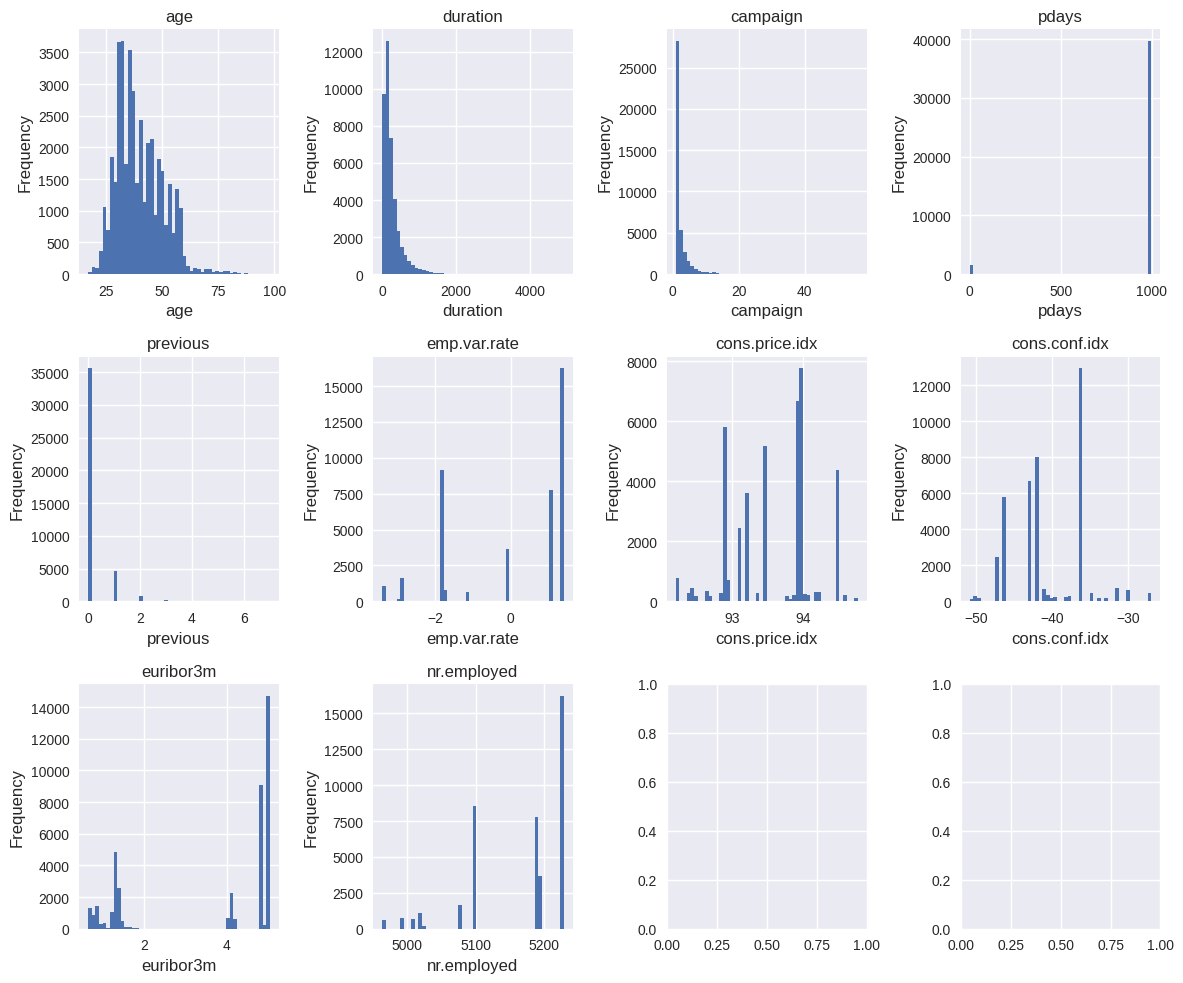

In [15]:
# Criar uma figura e eixos com 3 linhas e 4 colunas
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))

# Achatando os eixos em uma única dimensão
axes = axes.flatten()

# Plotar um histograma em cada eixo
for ax, coluna in zip(axes, numerical_features):
    df_train[coluna].plot(kind='hist', bins=50, title=coluna, ax=ax)
    ax.set_xlabel(coluna)
    ax.set_ylabel('Frequency')

# Ajustar layout
plt.tight_layout()
plt.show()


### Análise de outliers

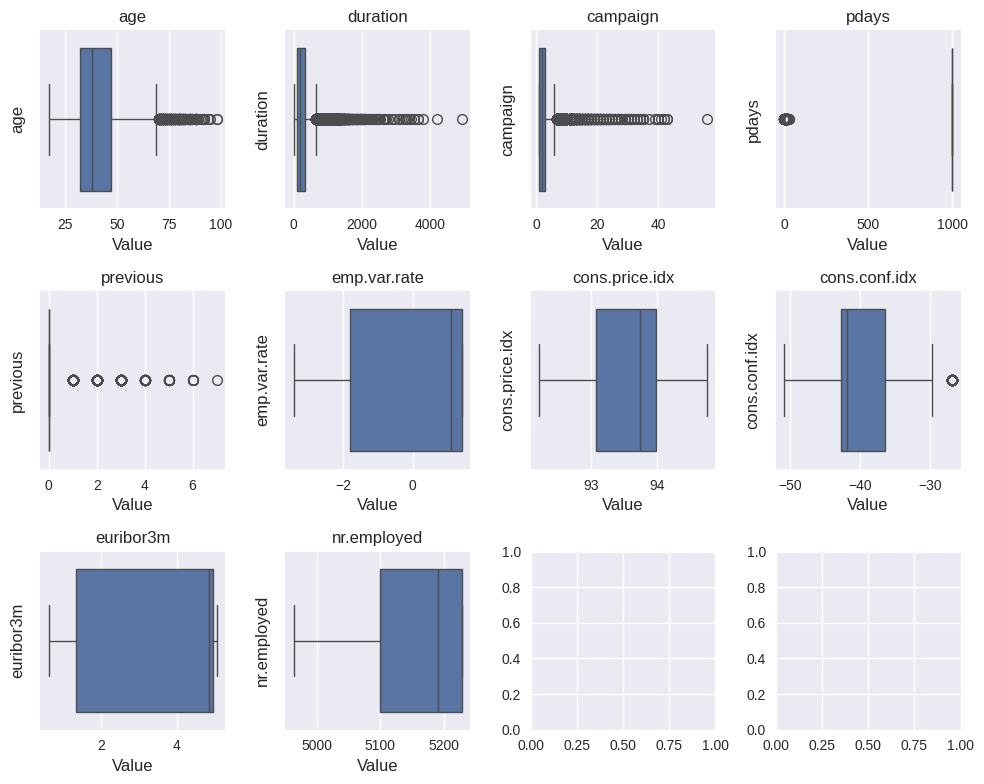

In [16]:
import seaborn as sns
# Criar uma figura e eixos com 3 linhas e 4 colunas
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))

# Achatando os eixos em uma única dimensão
axes = axes.flatten()

# Plotar um box plot em cada eixo usando Seaborn
for ax, coluna in zip(axes, numerical_features):
    sns.boxplot(x=df_train[coluna], ax=ax)
    ax.set_title(coluna)
    ax.set_xlabel('Value')
    ax.set_ylabel(coluna)

# Ajustar layout
plt.tight_layout()
plt.show()

Coluna: age
Limite inferior: 9.5
Limite superior: 69.5
Quantidade de outliers: 469
Percentual de outliers: 1.14%


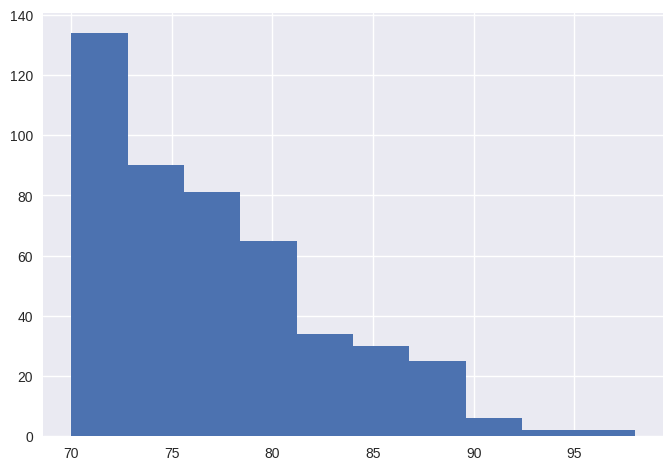

In [17]:
plt.hist(x = eda.outlier_analysis(df = df_train, column = 'age'), bins=10)
plt.show()

Coluna: duration
Limite inferior: -223.5
Limite superior: 644.5
Quantidade de outliers: 2963
Percentual de outliers: 7.19%


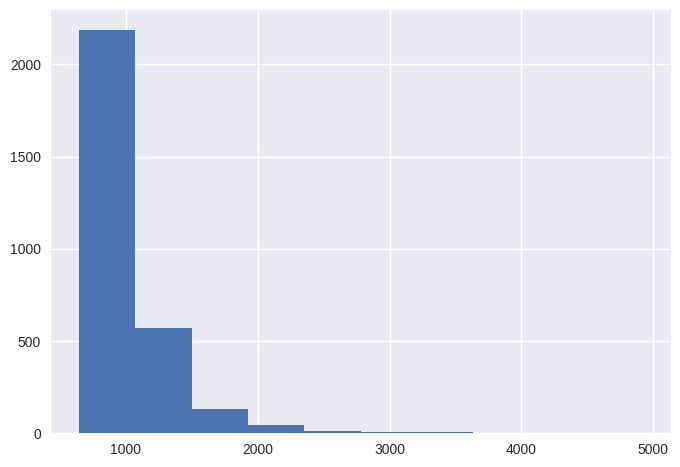

In [18]:
plt.hist(x = eda.outlier_analysis(df = df_train, column = 'duration'), bins=10)
plt.show()

Coluna: campaign
Limite inferior: -2.0
Limite superior: 6.0
Quantidade de outliers: 2406
Percentual de outliers: 5.84%


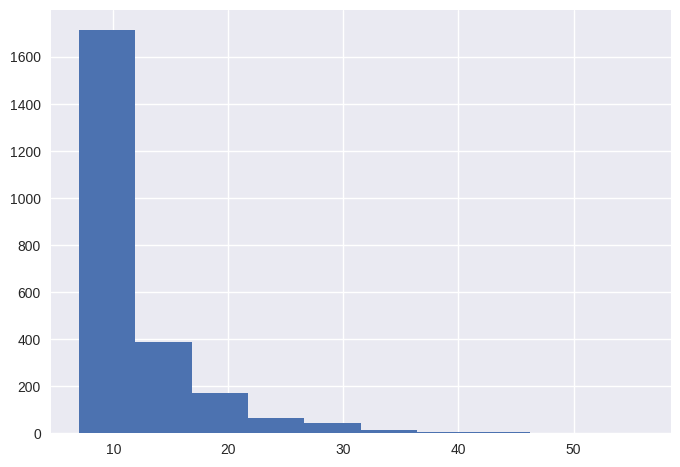

In [19]:
plt.hist(x = eda.outlier_analysis(df = df_train, column = 'campaign'), bins=10)
plt.show()

Coluna: pdays
Limite inferior: 999.0
Limite superior: 999.0
Quantidade de outliers: 1515
Percentual de outliers: 3.68%


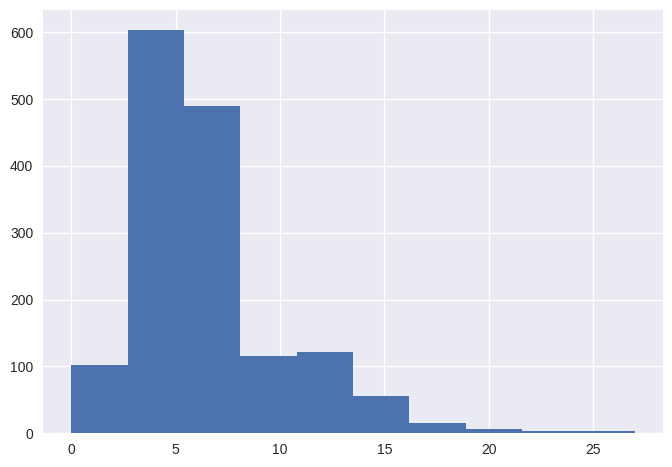

In [20]:
plt.hist(x = eda.outlier_analysis(df = df_train, column = 'pdays'), bins=10)
plt.show()

Coluna: previous
Limite inferior: 0.0
Limite superior: 0.0
Quantidade de outliers: 5625
Percentual de outliers: 13.66%


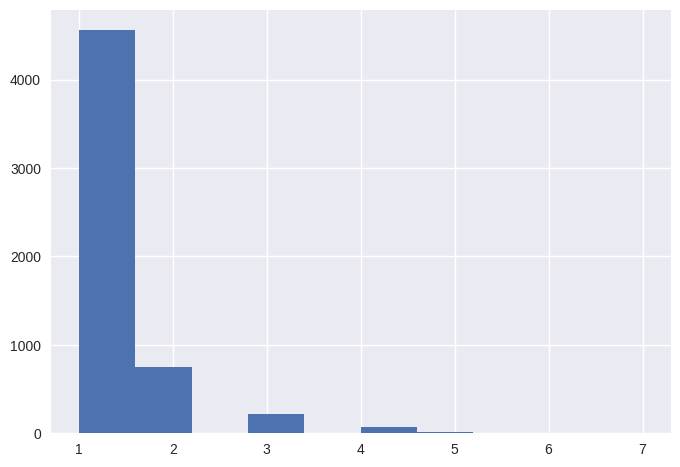

In [21]:
plt.hist(x = eda.outlier_analysis(df = df_train, column = 'previous'), bins=10)
plt.show()

### Análise das Transformações

          Original  Log Transformada
count  41188.00000      41188.000000
mean      40.02406          3.683249
std       10.42125          0.247438
min       17.00000          2.890372
25%       32.00000          3.496508
50%       38.00000          3.663562
75%       47.00000          3.871201
max       98.00000          4.595120


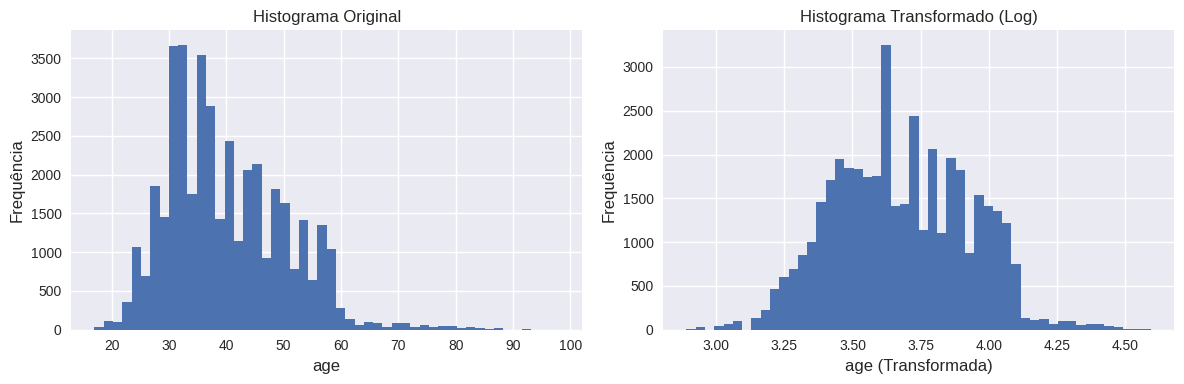

In [22]:
eda.analyze_column_transform(df = df_train, column='age')

           Original  Log Transformada
count  41188.000000      41188.000000
mean     258.285010          5.173036
std      259.279249          0.916938
min        0.000000          0.000000
25%      102.000000          4.634729
50%      180.000000          5.198497
75%      319.000000          5.768321
max     4918.000000          8.500861


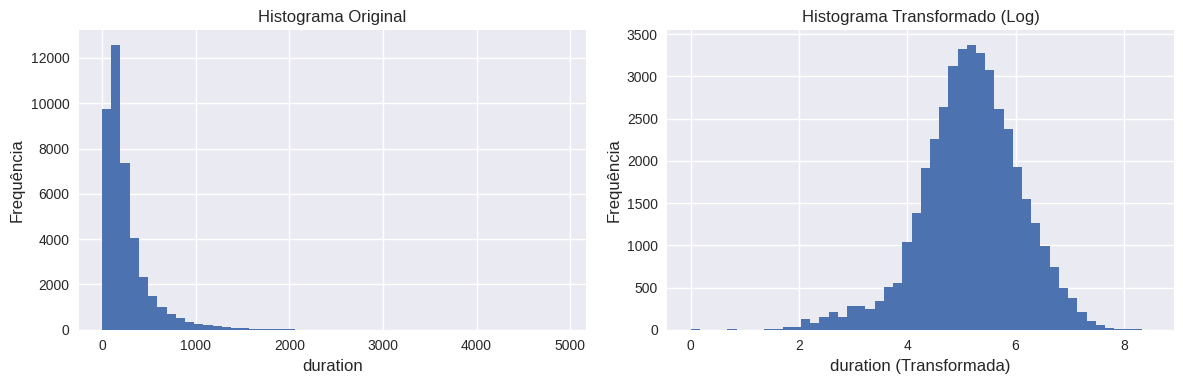

In [23]:
eda.analyze_column_transform(df = df_train, column='duration')

           Original  Log Transformada
count  41188.000000      41188.000000
mean       2.567593          1.118991
std        2.770014          0.491402
min        1.000000          0.693147
25%        1.000000          0.693147
50%        2.000000          1.098612
75%        3.000000          1.386294
max       56.000000          4.043051


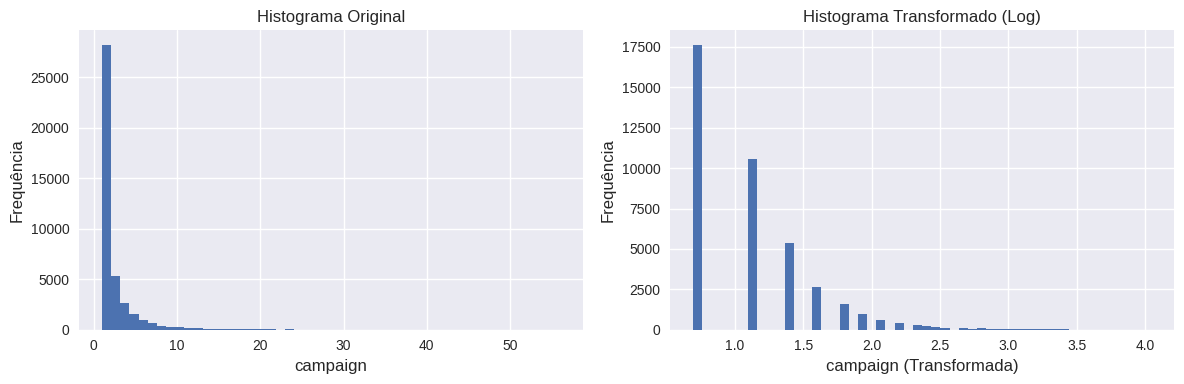

In [24]:
eda.analyze_column_transform(df = df_train, column='campaign')

### Features Categóricas

**Cardinalidade**

In [25]:
for coluna in categorical_features:
    print(f'### Coluna: {coluna} ###')
    if df_train[coluna].nunique() < 13:
        print(
            pd.concat([
                df_train[coluna].value_counts().rename('Counts'),
                np.round(df_train[coluna].value_counts(normalize=True).rename('Percentual')*100, 2)
            ], axis=1)
        )
        print('--'*80)
    else:
        print(f'Possui {df_train[coluna].nunique()} valores únicos')
        print('--'*80)

### Coluna: job ###
               Counts  Percentual
job                              
admin.          10422       25.30
blue-collar      9254       22.47
technician       6743       16.37
services         3969        9.64
management       2924        7.10
retired          1720        4.18
entrepreneur     1456        3.54
self-employed    1421        3.45
housemaid        1060        2.57
unemployed       1014        2.46
student           875        2.12
unknown           330        0.80
----------------------------------------------------------------------------------------------------------------------------------------------------------------
### Coluna: marital ###
          Counts  Percentual
marital                     
married    24928       60.52
single     11568       28.09
divorced    4612       11.20
unknown       80        0.19
-------------------------------------------------------------------------------------------------------------------------------------------------

## Análise de Correlação - Features

### Variáveis Numéricas - Correlação de Pearson

In [26]:
pd.set_option('display.max_rows', None)

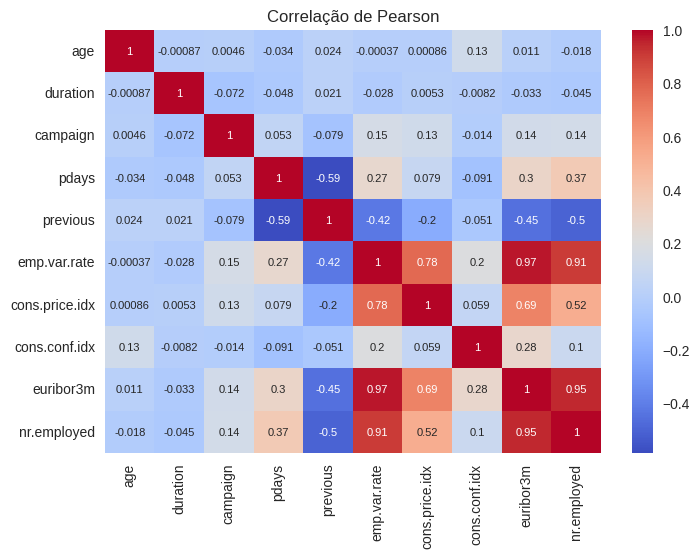

In [27]:
corr_matrix_person = df_train[numerical_features].corr(method='pearson')
# Criar um heatmap
sns.heatmap(corr_matrix_person, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlação de Pearson')
plt.show()

In [28]:
# Transformar a matriz de correlação em uma tabela
corr_table = corr_matrix_person.unstack().reset_index()
corr_table.columns = ['Feature 1', 'Feature 2', 'Pearson_Correlation']

# Filtrar a tabela para remover duplicatas e correlações de uma variável com ela mesma
corr_table = corr_table[corr_table['Feature 1'] != corr_table['Feature 2']]
corr_table = corr_table.drop_duplicates(subset=['Pearson_Correlation'])
corr_table = corr_table.sort_values(by='Pearson_Correlation', ascending=False)

corr_lim = 0.7
corr_table[abs(corr_table['Pearson_Correlation']) > corr_lim]

,Feature 1,Feature 2,Pearson_Correlation
58,emp.var.rate,euribor3m,0.972245
89,euribor3m,nr.employed,0.945154
59,emp.var.rate,nr.employed,0.906970
56,emp.var.rate,cons.price.idx,0.775334


In [29]:
from scipy.stats import pearsonr

# Calcular a correlação e o p-valor entre duas variáveis
corr, p_value = pearsonr(df_train['emp.var.rate'], df_train['cons.price.idx'])
print(f"Correlação: {corr}, P-valor: {p_value}")


Correlação: 0.7753341708350003, P-valor: 0.0


### Variáveis Numéricas - Correlação de Spearman


> Correlação de Spearman - Númerica, não parameétrica que detecta relações não lineares.

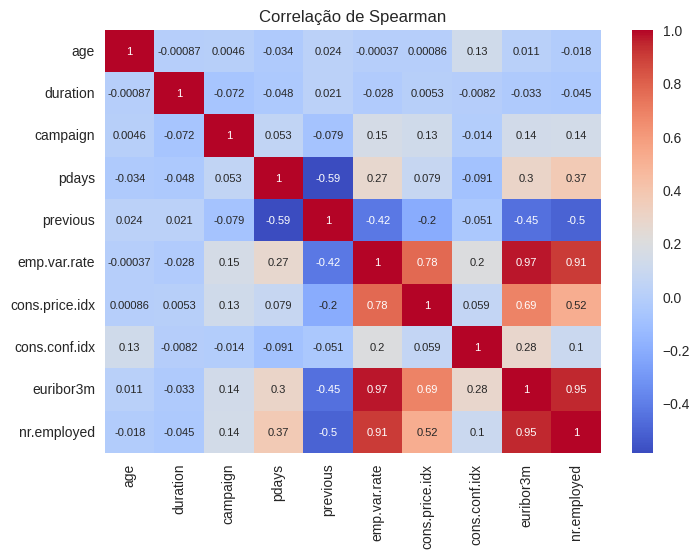

In [30]:
# Calcular a matriz de correlação de Spearman
corr_matrix_spearman = df_train[numerical_features].corr(method='spearman')
# Criar um heatmap
sns.heatmap(corr_matrix_person, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlação de Spearman')
plt.show()

In [31]:

# Transformar a matriz de correlação em uma tabela
corr_table = corr_matrix_spearman.unstack().reset_index()
corr_table.columns = ['Feature 1', 'Feature 2', 'Spearman_Correlation']

# Filtrar a tabela para remover duplicatas e correlações de uma variável com ela mesma
corr_table = corr_table[corr_table['Feature 1'] != corr_table['Feature 2']]
corr_table = corr_table.drop_duplicates(subset=['Spearman_Correlation'])
corr_table = corr_table.sort_values(by='Spearman_Correlation', ascending=False)

corr_lim = 0.7
corr_table[abs(corr_table['Spearman_Correlation']) > corr_lim]

,Feature 1,Feature 2,Spearman_Correlation
59,emp.var.rate,nr.employed,0.944702
58,emp.var.rate,euribor3m,0.939915
89,euribor3m,nr.employed,0.928857


In [32]:
from scipy.stats import spearmanr

# Calcular a correlação de Spearman e o p-valor entre duas variáveis
corr, p_value = spearmanr(df_train['euribor3m'], df_train['nr.employed'])
print(f"Correlação de Spearman: {corr}, P-valor: {p_value}")


Correlação de Spearman: 0.928856960185902, P-valor: 0.0


### Cremér's V test - Correlação entre as variáveis categóricas

In [33]:
import numpy as np
import pandas as pd
import scipy.stats as scis
from itertools import combinations

def cramers_v(contingency_table: pd.DataFrame) -> float:
    """
    Calcula o valor de Cramér's V para uma tabela de contingência.

    Parâmetros:
    contingency_table (pd.DataFrame): A tabela de contingência.

    Retorna:
    float: O valor de Cramér's V.
    """
    chi2 = scis.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    results =  np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    return results


def cramers_v_matrix(df: pd.DataFrame, categorical_features: list) -> pd.DataFrame:
    """
    Calcula a matriz de Cramér's V para variáveis categóricas em um DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame contendo os dados.
    categorical_features (List[str]): A lista de nomes das colunas categóricas a serem analisadas.

    Retorna:
    pd.DataFrame: Um DataFrame contendo os valores de Cramér's V para cada par de variáveis categóricas.
    """
    pairwise_test = []

    for col1, col2 in combinations(categorical_features, 2):
        contingency_table = pd.crosstab(df[col1], df[col2])
        cramers = cramers_v(contingency_table)
        pairwise_test.append((col1, col2, cramers))
    df_cramers = pd.DataFrame(pairwise_test, columns=['Feature 1', 'Feature 2', 'Cramers_V'])
    df_cramers = df_cramers.sort_values(by='Cramers_V', ascending=False)
    return df_cramers

df_cramers = cramers_v_matrix(df = df_train, categorical_features = categorical_features)
df_cramers.head()

,Feature 1,Feature 2,Cramers_V
30,housing,loan,0.707870
39,contact,month,0.609259
1,job,education,0.359867
43,month,poutcome,0.242845
41,contact,poutcome,0.242516


## Feature Selection

### Poder de previsão das variáveis: Weight of Evidence e Information Value

In [34]:
iv, woe = eda.iv_woe(data = df_train, target = 'target')
iv

,Variable,IV,Predictiveness
0,duration,1.961794,Suspicious Predictive Power
0,nr.employed,1.173723,Suspicious Predictive Power
0,emp.var.rate,1.069750,Suspicious Predictive Power
0,euribor3m,1.046047,Suspicious Predictive Power
0,cons.conf.idx,0.860740,Suspicious Predictive Power
0,poutcome,0.547671,Suspicious Predictive Power
0,month,0.485117,Strong predictive Power
0,cons.price.idx,0.440236,Strong predictive Power
0,previous,0.350500,Strong predictive Power
0,contact,0.251663,Medium predictive Power


## Análise de Correlação - Features vs Target

In [35]:
numerical_corr = df_train.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_corr)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'target']


In [36]:
corr = df_train[numerical_corr].corr(method='pearson')

# Filtrar as features com correlação maior que 0.1 suas correlações com a coluna 'target'
corr_target = abs(corr['target'])
relevant_features = corr_target[corr_target > 0.1].index.tolist()

# Criar uma tabela com features relevantes e 
relevant_corr_table = pd.DataFrame({
    'Feature': relevant_features,
    'Correlation': corr.loc[relevant_features, 'target']
}).reset_index(drop=True)
relevant_corr_table = relevant_corr_table.sort_values(by='Correlation', ascending=False)
relevant_corr_table

,Feature,Correlation
7,target,1.000000
0,duration,0.405274
2,previous,0.230181
4,cons.price.idx,-0.136211
3,emp.var.rate,-0.298334
5,euribor3m,-0.307771
1,pdays,-0.324914
6,nr.employed,-0.354678


In [37]:
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


### Analise de Correlação de V Cramer's

In [38]:
cat_test = []
for categ_col in categorical_features:
    contingency_table = pd.crosstab(df_train[categ_col], df_train['target'])
    cramers_v_value = cramers_v(contingency_table)  # Calculando o valor de Cramér's V
    cat_test.append((categ_col, cramers_v_value))

df_cat_test = pd.DataFrame(cat_test, columns=['Feature','cramers_v_value'])
df_cat_test = df_cat_test.sort_values(by='cramers_v_value', ascending=False)
df_cat_test


,Feature,cramers_v_value
9,poutcome,0.320488
7,month,0.274395
0,job,0.152768
6,contact,0.144693
3,default,0.099354
2,education,0.068472
1,marital,0.054570
8,day_of_week,0.025195
4,housing,0.011748
5,loan,0.005154
